### <span style='color:blue'> Exploratory Data Analysis</span>

- **This notebook focusses on the first step of any data science project: exploring the data.**
- **Exploratory Data Analysis or EDA is to get familiar to our data, identifying important columns, perform data manipulation and 
asking interesting questions from our data using visualization tools.**

## <span style='color:blue'>Data Description</span>

### Dataset Overview

• **Name of the dataset:** Health Insuarance Charges Dataset.

• **Source:** Health Insuarance Company Data.

• **Purpose:** The dataset is used to analyze factors influencing insurance charges, which can help in understanding how health habits impact healthcare costs.

### Structure of Dataset

• **Format:** It is a CSV file.

• **Number of Rows and Colums:** There are total 1338 rows and 7 columns.

### Description of Columns

**1.** **age:** Represents the age of the individual.

**2.** **sex:** Represents the gender of the individual.

**3.** **bmi:** It represent measure of body fat based on height and weight.

**4.** **children:** Represent the number of children covered under insurance policy.

**5.** **smoker:** Indicate whether the individual is a smoker or not.

**6.** **region:** Specifies the region in United States where the individual lives.

**6.** **charges:** Represents the total medical charges billed to the insurance for the individual.

- The data is complete for analysis.

### <span style='color:blue'>Load Dataset</span>

- Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
health_df = pd.read_csv(r'C:\Users\jadem\Fireblaze\Python fireblaze\Healthcare Insurance.csv')
health_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


There are Total 1338 rows and 7 columns in our dataset

In [3]:
health_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### <span style='color:blue'>Data Exploration</span>

In [7]:
health_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Observation**

**Age:**

- The average age is around 39.20.
- The age ranges from 18 to 64 years.
- The age distribution has a standard deviation of 14.04.

**BMI:**

- The average BMI count is 30.66.
- The BMI ranges from 15.96 to 53.13.
- The BMI has a standard deviation of 6.09.

**Childrem:**

- There is about 1 children per beneficiary.
- The number pf children ranges from 0 to 5.
- The standard deviation for the number of children is 1.20

**Charges:**

- The average insurance charge is 13270.42
- The charges ranges from 1121.87 to 63770.42.
- The standard deviation for charges is 12110.01.

In [8]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### <span style='color:red'>Observation</span>
- There are no null value present in our dataset
- Most of the rows are numerical

### Correlation plot of numeric columns

In [22]:
correlation = health_df[['age','bmi','children','charges']].corr()
correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


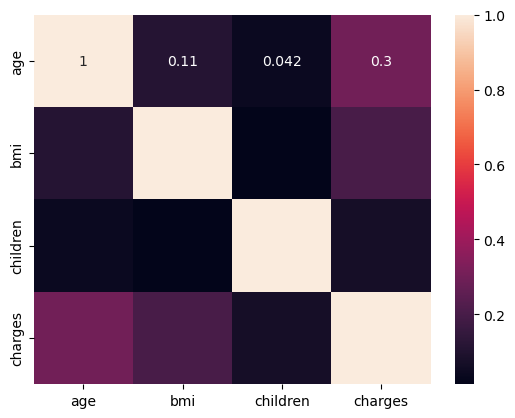

In [31]:
# Creating heatmap of the correlation matrix

sns.heatmap(correlation,annot=True)
plt.show()

### Bar Plot of Gender

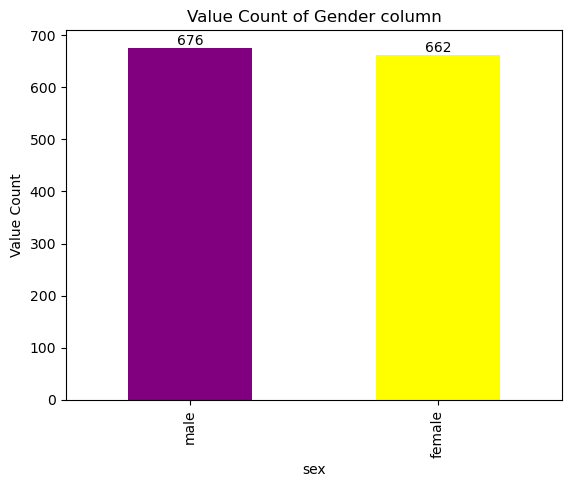

In [29]:
A = health_df['sex'].value_counts().plot(kind='bar',color=['purple','yellow'])
for i in A.containers:
    A.bar_label(i)
plt.title('Value Count of Gender column')
plt.ylabel('Value Count')
plt.show()

#### <span style='color:red'>Observation</span>

There are total 676 male amd 662 female present in our dataset

### Bar Plot of Number of Number of Children

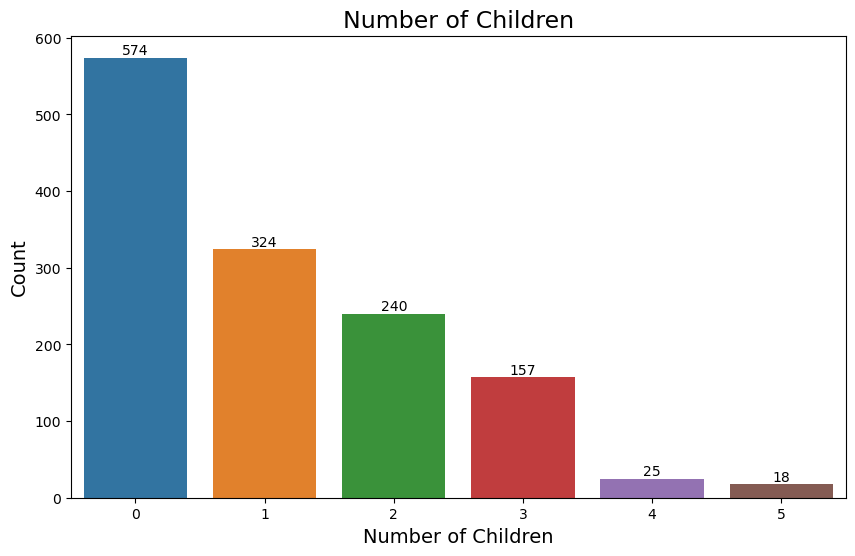

In [21]:
plt.figure(figsize=(10,6))
A = sns.countplot(x='children', data=health_df)
for i in A.containers:
    A.bar_label(i)
plt.title('Number of Children', fontsize=17)
plt.xlabel('Number of Children',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

#### <span style='color:red'>Observation</span>

- Out of total beneficiaries in our dataset 574 has no children, 324 has 1 child, 240 has 2 childrens, 157 has 3 childrens, 25 have 4 childrens and 18 have 5 childrens.

### Bar Plot of Region

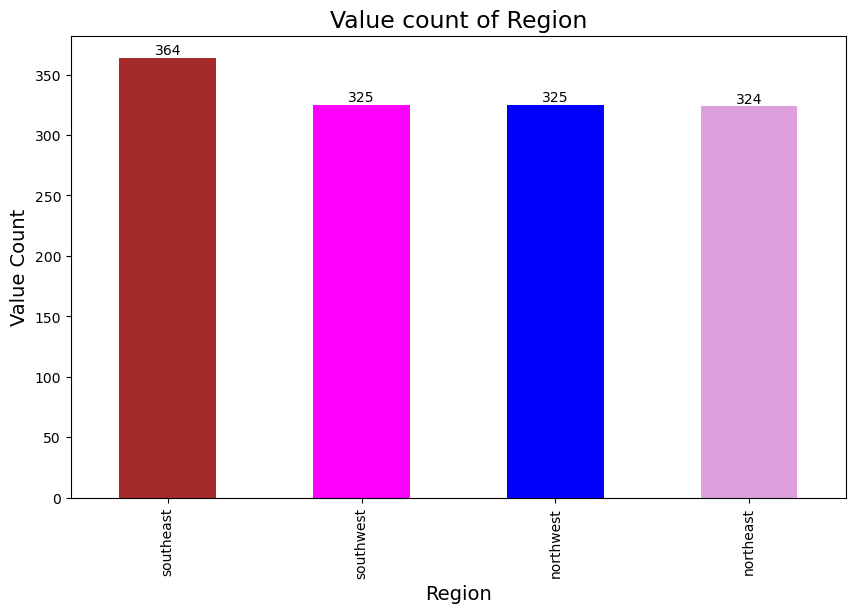

In [72]:
plt.figure(figsize=(10,6))
A = health_df['region'].value_counts().plot(kind='bar',color=['brown','magenta','blue','plum'])
plt.title("Value count of Region",fontsize=17)
plt.xlabel('Region',fontsize=14)
plt.ylabel('Value Count',fontsize=14)
for i in A.containers:
    A.bar_label(i)
plt.show()

#### <span style='color:red'>Observation</span>

- Out of all beneficiaries, 364 are from southeast, 325 are from southwest, 325 are from northwest and 324 are from northeast.

### Bar Plot of Smoker

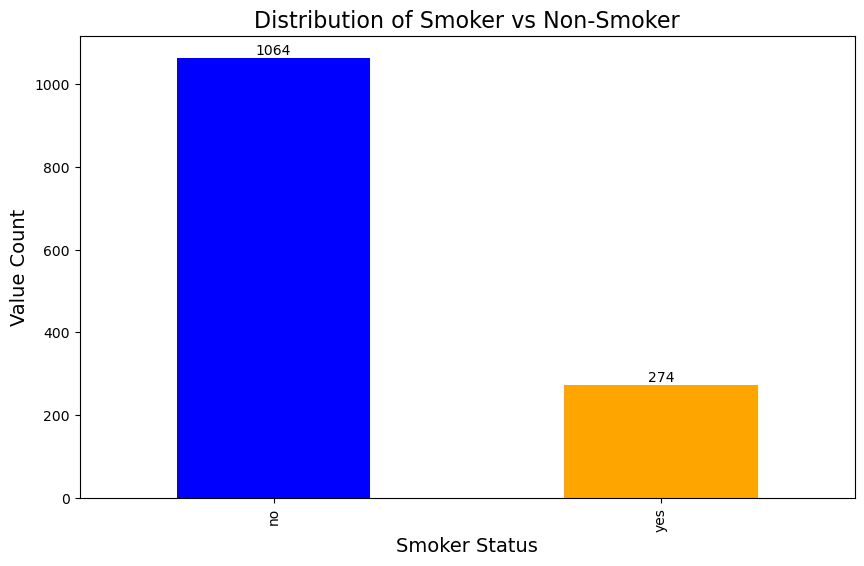

In [80]:
plt.figure(figsize=(10,6))
A = health_df['smoker'].value_counts().plot(kind='bar',color=['blue','orange'])
for i in A.containers:
    A.bar_label(i)
plt.title("Distribution of Smoker vs Non-Smoker",fontsize=16)
plt.xlabel('Smoker Status',fontsize=14)
plt.ylabel('Value Count',fontsize=14)
plt.show()

#### <span style='color:red'>Observation</span>

- With the help of this graph, we can tell that there are total 274 beneficiers who are smokers and 1064 beneficiers are non-smokers.

### Hist plot of Age

C:\Users\jadem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


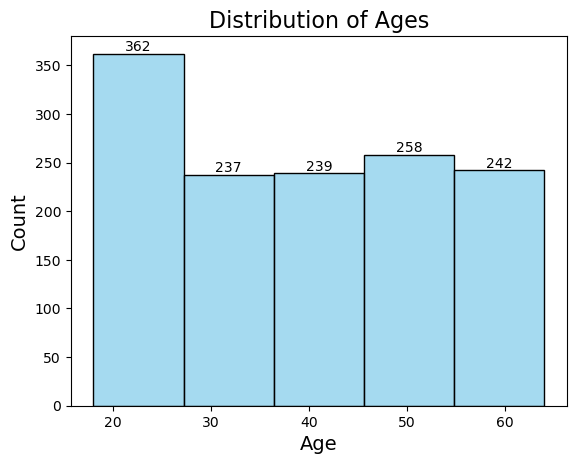

In [108]:
A = sns.histplot(data=health_df, x='age',bins=5,color='skyblue')
plt.title('Distribution of Ages',fontsize=16)
for i in A.containers:
    A.bar_label(i)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

#### <span style='color:red'>Observation</span>

- The histogram show a peak in the age range between 18 to 27 years, it indicates that major beneficiaries are from younger age.

### Hist plot of BMI

C:\Users\jadem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


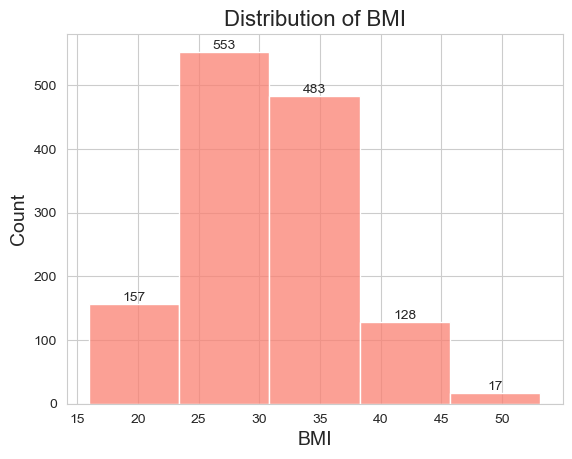

In [115]:
A = sns.histplot(data=health_df, x='bmi',bins=5,color='salmon')
plt.title('Distribution of BMI',fontsize=16)
for i in A.containers:
    A.bar_label(i)
plt.xlabel('BMI',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

#### <span style='color:red'>Observation</span>

- The histogram takes peak between BMI range 23 to 31

### Box Plot for Charges

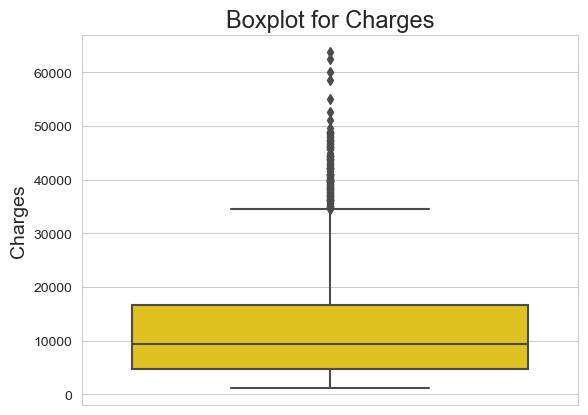

In [123]:
sns.boxplot(data=health_df, y='charges',color='gold')
plt.title('Boxplot for Charges',fontsize=17)
plt.ylabel('Charges',fontsize=14)
plt.show()

#### <span style='color:red'>Observation</span>

- The median charges appear to be arount $9000, as it it represented by the line.
- There are many outliers on the upper side.

### Scatter Plot for Age and BMI

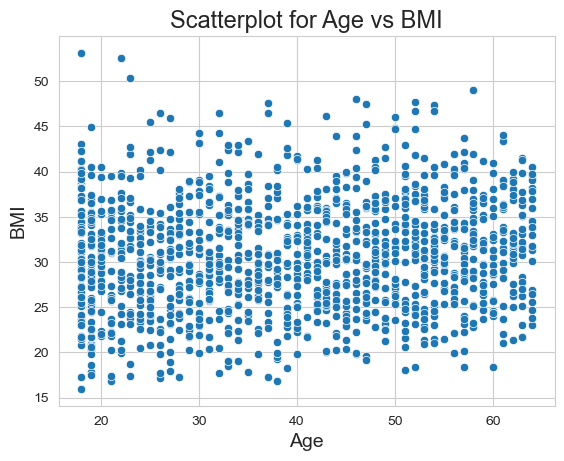

In [163]:
sns.scatterplot(data=health_df,x='age',y='bmi')
plt.xlabel('Age',fontsize=14)
plt.ylabel('BMI',fontsize=14)
plt.title('Scatterplot for Age vs BMI',fontsize=17)
plt.show()

#### <span style='color:red'>Observation</span>

- There is no clear trend between age and bmi. The data points are scattered without a particulare pattern indicating that BMI does not strongly correlate with age.
- Most BMI falls between 27 to 35.
- There do not appear to be extreme outlier. All BMI values falls within a reasonable range of ages.

### Scatter Plot for Age and Charges

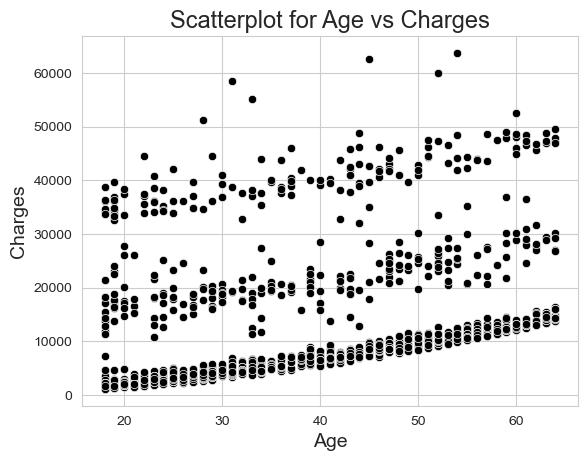

In [162]:
sns.scatterplot(data=health_df, x='age',y='charges',color='black')
plt.xlabel('Age',fontsize=14)
plt.ylabel('Charges',fontsize=14)
plt.title('Scatterplot for Age vs Charges',fontsize=17)
plt.show()

#### <span style='color:red'>Observation</span>

- Healthcare cost incTreases with ages.
- Younger individuals generally have lower charges.
- There are significant outliers in dataset, with charges reaching above $40,000.

### Boxplot for Sex vs Charges

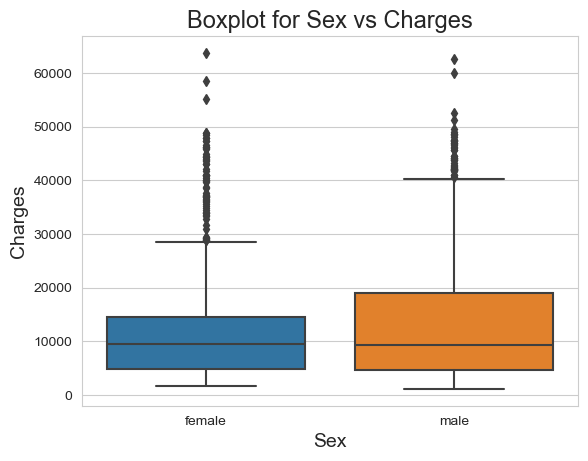

In [160]:
sns.boxplot(data=health_df, x='sex', y='charges')
plt.title('Boxplot for Sex vs Charges',fontsize=17)
plt.xlabel('Sex',fontsize=14)
plt.ylabel('Charges',fontsize=14)
plt.show()

#### <span style='color:red'>Observation</span>

- The plot shows that male have more insurance charges the female i.e above median line.
- Male have less outliers as compared to female.
- Male can have maximum of 40000 charges after that very few males have insurance charges after that.
- Female have maximum of 28000 charges after that outliers start.

#### Boxplot for Smoker vs Chargers

Text(0, 0.5, 'Charges')

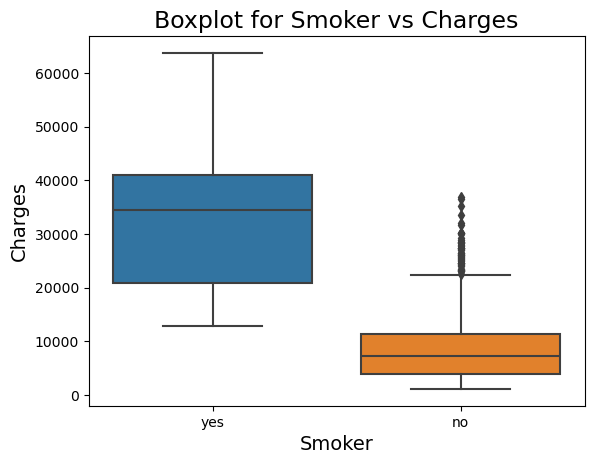

In [14]:
sns.boxplot(data=health_df, x='smoker', y='charges')
plt.title('Boxplot for Smoker vs Charges',fontsize=17)
plt.xlabel('Smoker',fontsize=14)
plt.ylabel("Charges",fontsize=14)

#### <span style='color:red'>Observation</span>`

- Smokers get high charges as compared to non-smokers.

#### Bosplot for Region vs Charges

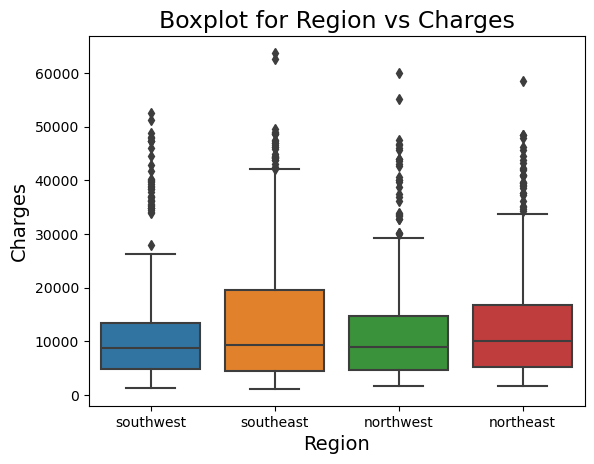

In [12]:
sns.boxplot(data=health_df,x='region',y='charges')
plt.title('Boxplot for Region vs Charges',fontsize=17)
plt.xlabel('Region',fontsize=14)
plt.ylabel('Charges',fontsize=14)
plt.show()

#### <span style='color:red'>Observation</span>

- We can see that southeast region have more insurance charges than other.
- Southwest have low insurance charges as compared to others.
- There are significant outliers are present but particularly high in southeast and northwest region which represent individuals with exceptionally high charges.

### Scatterplot for Children vs Charges

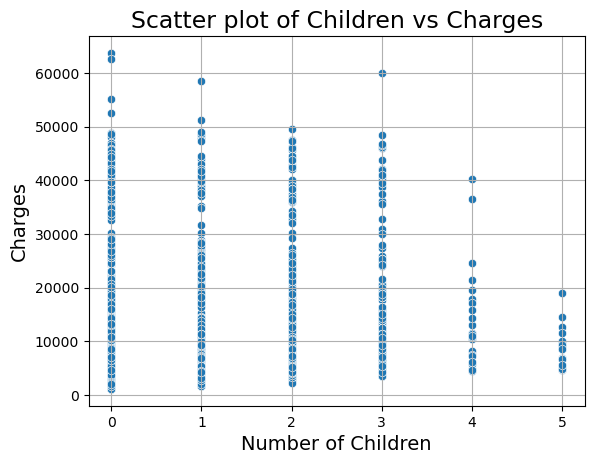

In [12]:
sns.scatterplot(data=health_df, x='children', y='charges')
plt.title('Scatter plot of Children vs Charges',fontsize=17)
plt.xlabel('Number of Children',fontsize=14)
plt.ylabel('Charges',fontsize=14)
plt.grid(True)
plt.show()

#### <span style='color:red'>Observation</span>

- 0, 1 and 3 children charges are significantly higher than others.
- 5 children have very low charges.
- The outlier of 0 children is high.

### Stacked Bar chart for Age vs Smoker

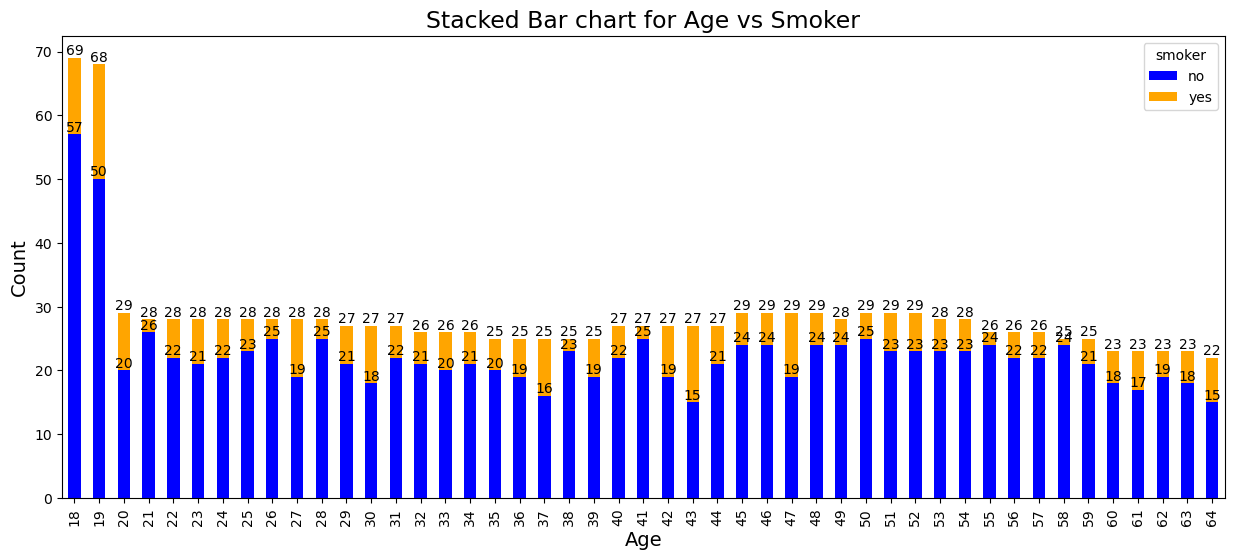

In [29]:
smoker_counts = health_df.groupby(['age','smoker']).size().unstack(fill_value=0)
A = smoker_counts.plot(kind='bar',stacked=True,figsize=(15,6),color=['blue','orange'])
for i in A.containers:
    A.bar_label(i)
plt.title('Stacked Bar chart for Age vs Smoker',fontsize=17)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

#### <span style='color:red'>Observation</span>

- Majority of smokers are present in age 19 years after that age 18 and 43.
- Majority of non-smokers are present in age 18yrs i.e 27 non-smokers aftrer that 19yrs i.e 50 non-smokers.

#### Stacked Bar chart for Age vs Region.

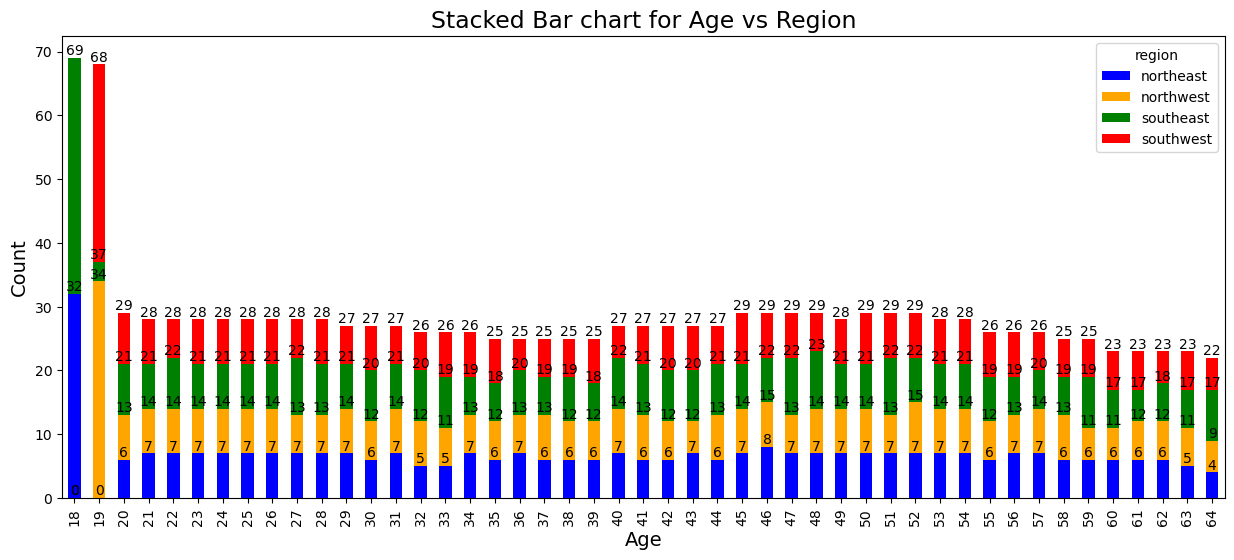

In [9]:
region_counts = health_df.groupby(['age','region']).size().unstack(fill_value=0)
A = region_counts.plot(kind='bar',stacked=True,figsize=(15,6),color=['blue','orange','green','red'])
for i in A.containers:
    A.bar_label(i)
plt.title('Stacked Bar chart for Age vs Region',fontsize=17)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

#### <span style='color:red'>Observation</span>

- At age 19yrs, there is no individual from southwest and northwest region.
- Most northeast peoples are from age 18yrs i.e 37 people.
- Most southeast peoples are also from age 18yrs i.e 32 people.
- Most northwest peoples are present from age 19yrs i.e 34 people.
- mMost southwest peoples are present from age 19yrs i.e 31 people.
- There are only 3 peoples from southeast present in age 19yes.

#### Side by Side Bar Graph for Children vs Smoker

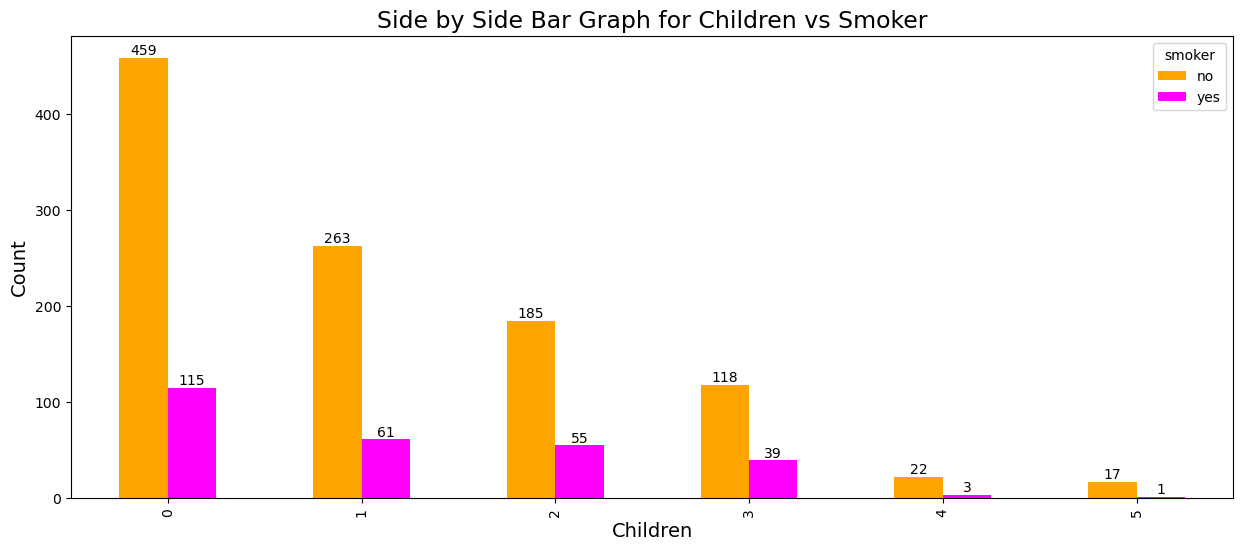

In [20]:
smoker_counts = health_df.groupby(['children','smoker']).size().unstack(fill_value=0)
A = smoker_counts.plot(kind='bar',figsize=(15,6),color=['orange','magenta'])
for i in A.containers:
    A.bar_label(i)
plt.title('Side by Side Bar Graph for Children vs Smoker',fontsize=17)
plt.xlabel('Children',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

#### <span style='color:red'>Observation</span>

- Majority of non-smokers have 0 children i.e 459 smokers have 0 children and 115 smokers have 0 children.
- Only 1 smoker has 5 children and 17 smoker have 5 children.

#### Side by Side Bar Graph for Children vs Region

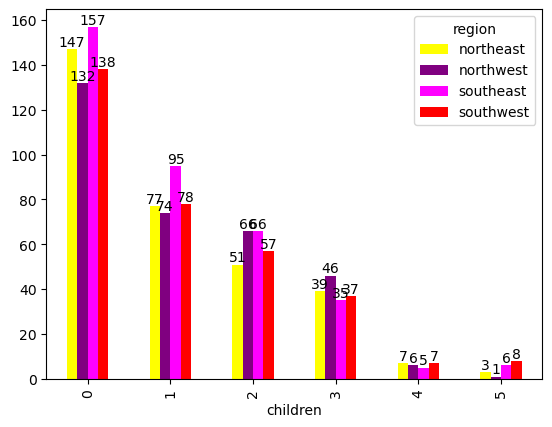

In [55]:
region_counts = health_df.groupby(['children','region']).size().unstack(fill_value=0)
A = region_counts.plot(kind='bar',stacked=False,color=['Yellow','Purple','magenta','red'])
for i in A.containers:
    A.bar_label(i)

#### <span style='color:red'>Observation</span>

- Southwest have 8 individuals with 5 childrens.
- Northeast, northwest, southeast, southwest have most individuals with 0 children.
- Northwest have only 1 individual with 5 children.

#### Boxplot for BMI vs Region

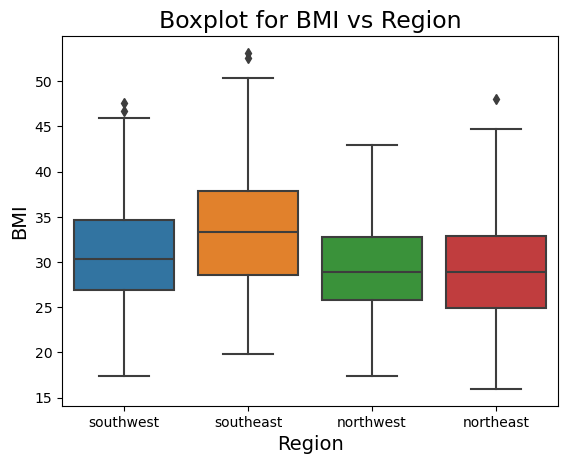

In [60]:
sns.boxplot(data=health_df, x='region',y='bmi')
plt.title('Boxplot for BMI vs Region',fontsize=17)
plt.xlabel('Region',fontsize=14)
plt.ylabel('BMI',fontsize=14)
plt.show()

#### <span style='color:red'>Observation</span>

- The median line for BMI varies for all region.
- Southeast region have most BMI range, it's maximum range is 54.
- Northwest region have low BMI as compared to other region.

#### Boxplot for BMI vs Smoker

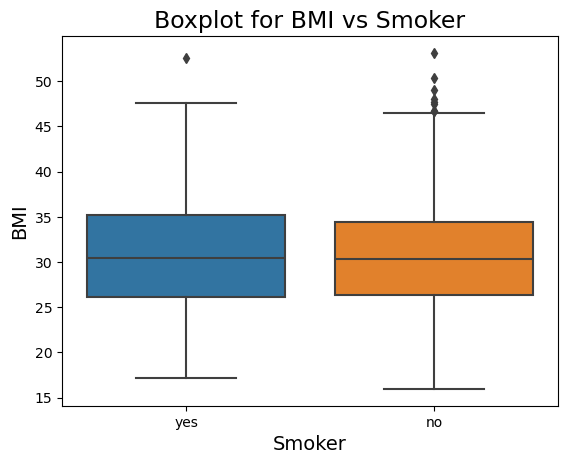

In [67]:
sns.boxplot(data=health_df, x='smoker',y='bmi')
plt.title('Boxplot for BMI vs Smoker',fontsize=17)
plt.xlabel('Smoker',fontsize=14)
plt.ylabel('BMI',fontsize=14)
plt.show()

#### <span style='color:red'>Observation</span>

- There is not much difference between smoker and non-smoker.
- Smoker have most bmi rate.
- Non-smoker have most outliers.

#### Scatterplot for Age vs BMI vs Charges 

Text(0, 0.5, 'BMI')

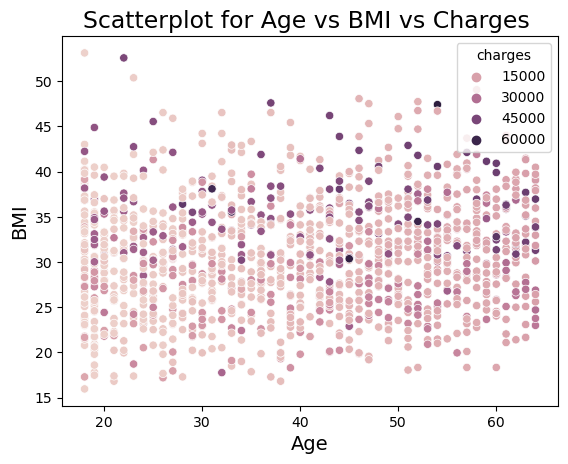

In [77]:
sns.scatterplot(data=health_df,x='age',y='bmi',hue='charges')
plt.title('Scatterplot for Age vs BMI vs Charges ',fontsize=17)
plt.xlabel('Age',fontsize=14)
plt.ylabel('BMI',fontsize=14)

#### <span style='color:red'>Observation</span>

- Charges increases with age, there is a positive correlation between age and charges.
- individual between BMI range 30 to 40 have high charges.

#### Scatterplot for Age vs BMI vs Sex

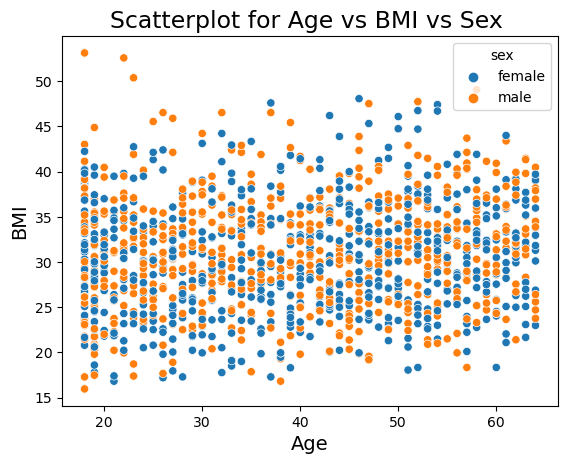

In [86]:
sns.scatterplot(data=health_df,x='age',y='bmi',hue='sex')
plt.title('Scatterplot for Age vs BMI vs Sex ',fontsize=17)
plt.xlabel('Age',fontsize=14)
plt.ylabel('BMI',fontsize=14)
plt.show()

#### <span style='color:red'>Observation</span>

- Majority of Males have high BMI.
- Between age 18 to 30 males have high range.
- As the age increases females have high bmi.

#### Scatterplot for BMI vs Charges vs Smoker

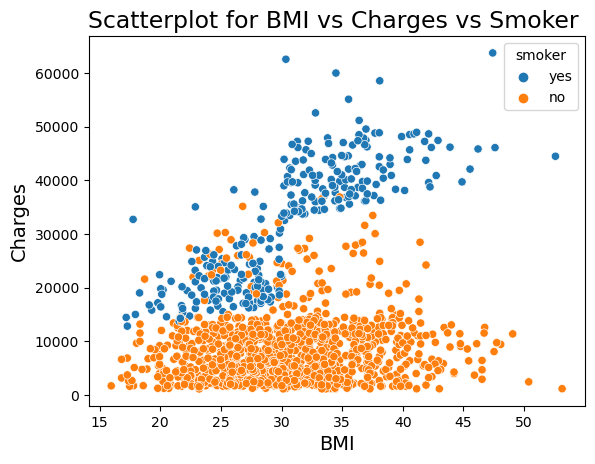

In [92]:
sns.scatterplot(data=health_df,x='bmi',y='charges',hue='smoker')
plt.title('Scatterplot for BMI vs Charges vs Smoker ',fontsize=17)
plt.xlabel('BMI',fontsize=14)
plt.ylabel('Charges',fontsize=14)
plt.show()

#### <span style='color:red'>Observation</span>

- As we can see non-smokers have low charges as compared to smokers.
- Smokers have high medical charges.
- High BMI individuals have very low charges.
- Betweem the BMI 30 to 45 non-smokers have less charges as compared to smokers.

#### Scatterplot for Age vs Charges vs Region

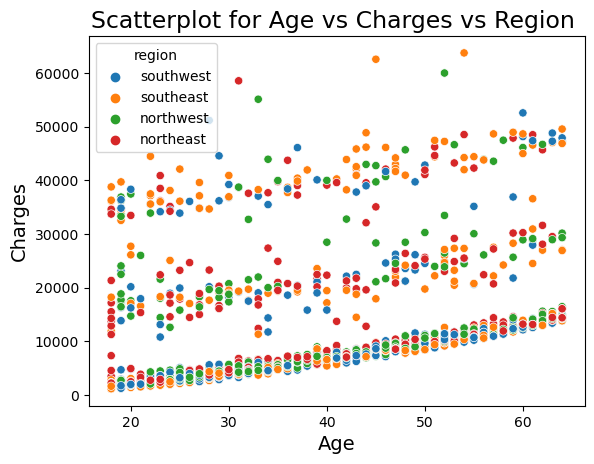

In [95]:
sns.scatterplot(data=health_df,x='age',y='charges',hue='region')
plt.title('Scatterplot for Age vs Charges vs Region ',fontsize=17)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Charges',fontsize=14)
plt.show()

#### <span style='color:red'>Observation</span>

- Southwest region get high insurance charges
- Between age 18 to 25 people doesn't get much insurance.

#### Boxplot for Children vs Charges vs Smoker

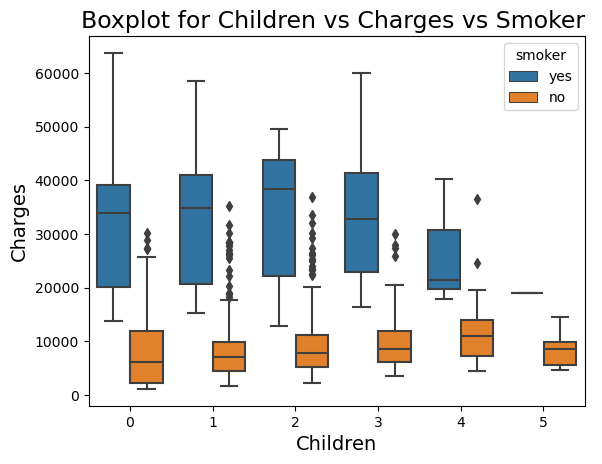

In [9]:
sns.boxplot(data=health_df,x='children',y='charges',hue='smoker')
plt.title('Boxplot for Children vs Charges vs Smoker ',fontsize=17)
plt.xlabel('Children',fontsize=14)
plt.ylabel('Charges',fontsize=14)
plt.show()

#### <span style='color:red'>Observation</span>

- Smoker gets very high medical charges.
- Non-smoker get less charges.
- individual with 0 children gets high medical charges.
- Non-smoker have most outliers.
- Individual with smoker and with 5 children doesn't get any charges.
- Smoker individuals doesn't have outliers

#### Pairplot

C:\Users\jadem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jadem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jadem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jadem\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

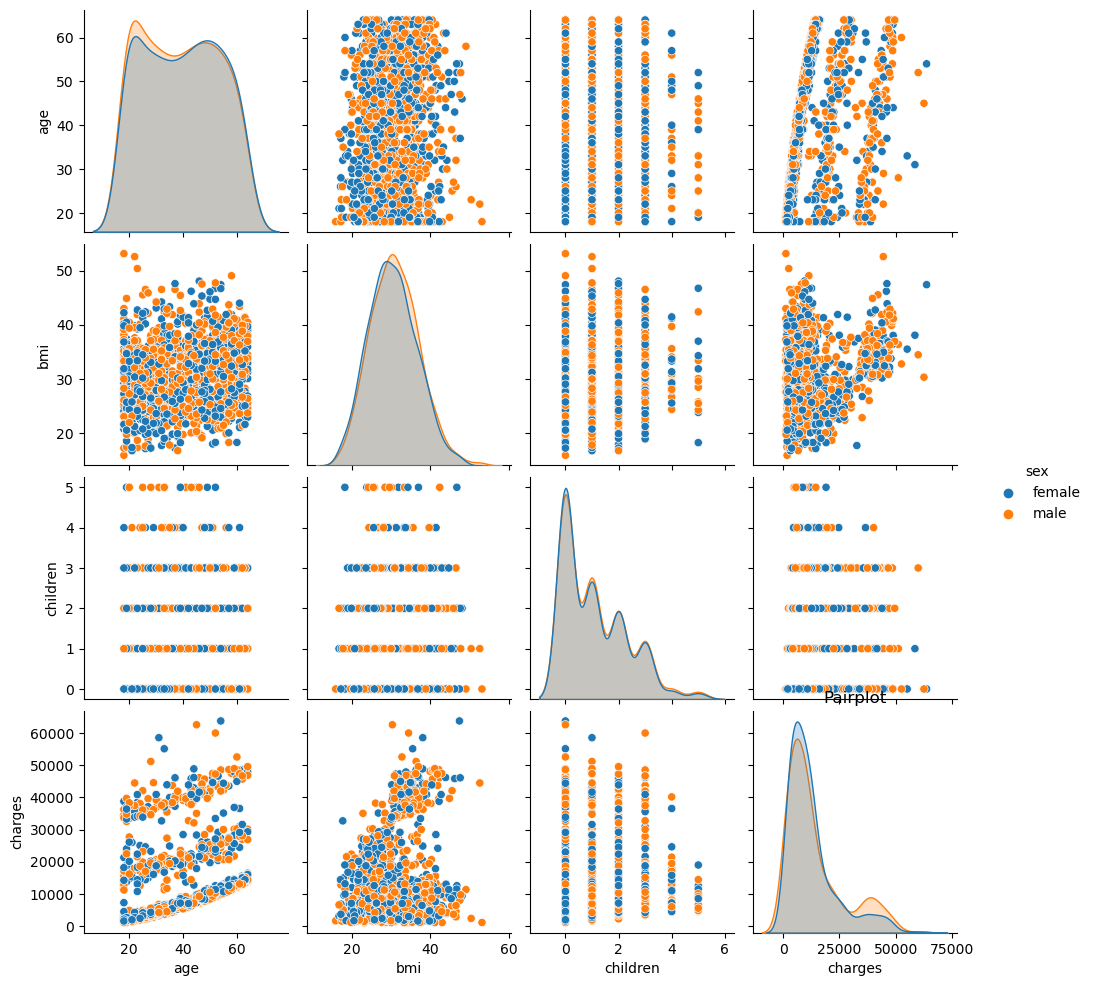

In [102]:
sns.pairplot(data=health_df,hue='sex')
plt.show()

#### <span style='color:red'>Observation</span>

- There are many graphs and we can extract many information from this graphs.

### Conclusion

Based on the analysis of Healthcare insurance dataset, several key insights and patterns have emerged that can
inform strategic decision-making:

**Age Distribution:** The insured population predominantly consists of younger adults, with a peak in the age range of 25-35 years. This suggests a need for targeted plans and benefits catering to this age group.

**Gender Distribution:** The dataset includes a balanced representation of both male and female beneficiaries, highlighting the need for gender-specific health services and programs.

**BMI Distribution:** A significant portion of beneficiaries falls within the overweight, indicating potential health risks and higher healthcare costs associated with these conditions.

**Number of Children:** A considerable number of beneficiaries has no children, suggesting the demand for individual and couple insurance plans. Additionally, there is a need to cater to families with children through comprehensive family plans.

**Smoking Status:** The dataset shows that there a maximum number of non-smokers.

**Regional Distribution:** Beneficiaries are distributed across various regions, requiring region-specific healthcare services and resource allocation.

**Insurance Charges:** Medical charges vary widely, influenced by factors such as age, BMI, smoking status, and number of children. Understanding these cost drivers is essential for developing accurate pricing models.